In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##loading data
DB  = pd.read_csv("T_ONTIME_2016_V3.csv")

In [2]:
## check number of examples and columns in the dataset
DB.shape

(460949, 14)

460949 observations and 14 columns (including the traget =ARR_DEL15)

In [3]:
##checking missing values
print(DB.shape[0]- DB.count())

MONTH                  0
DAY_OF_WEEK            0
UNIQUE_CARRIER         0
AIRLINE_ID             0
ORIGIN                 0
DEST                   0
DEP_TIME            7227
ARR_TIME            7730
ARR_DELAY           8720
ARR_DEL15           8720
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       1
DISTANCE               0
dtype: int64


460949 observations, we have 8720 missing values in our target variable ARR_DEL15 those need to be dropped since we cannot use them and the missing values are only a small fraction of the dataset therefore won't affect the accuracy 
of the classifier (at least not by much). We have missing values in DEP_TIME, ARR_TIME,ARR_DELAY, ARR_DEL15 and CRS_ELAPSED_TIME. All NANs will be dropped.

In [2]:
# Drop rows with missing values
DB = DB.dropna()

In [5]:
# check the data table to make sure columns and rows are valid
DB.head(5)

,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN,DEST,DEP_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
0,12,4,VX,21171,DAL,SFO,1252.0,1440.0,-19.0,0.0,0,0,239.0,1476
1,12,4,VX,21171,DAL,SFO,1828.0,2017.0,-12.0,0.0,0,0,239.0,1476
2,12,4,VX,21171,SFO,DAL,1721.0,2235.0,-15.0,0.0,0,0,205.0,1476
3,12,4,VX,21171,DAL,DCA,702.0,1028.0,-22.0,0.0,0,0,160.0,1184
4,12,4,VX,21171,DAL,LAS,1022.0,1119.0,-1.0,0.0,0,0,170.0,1067


In [6]:
# check that all NANs are dropped and we don't have missing values.
print(DB.shape[0]- DB.count())

MONTH               0
DAY_OF_WEEK         0
UNIQUE_CARRIER      0
AIRLINE_ID          0
ORIGIN              0
DEST                0
DEP_TIME            0
ARR_TIME            0
ARR_DELAY           0
ARR_DEL15           0
CANCELLED           0
DIVERTED            0
CRS_ELAPSED_TIME    0
DISTANCE            0
dtype: int64


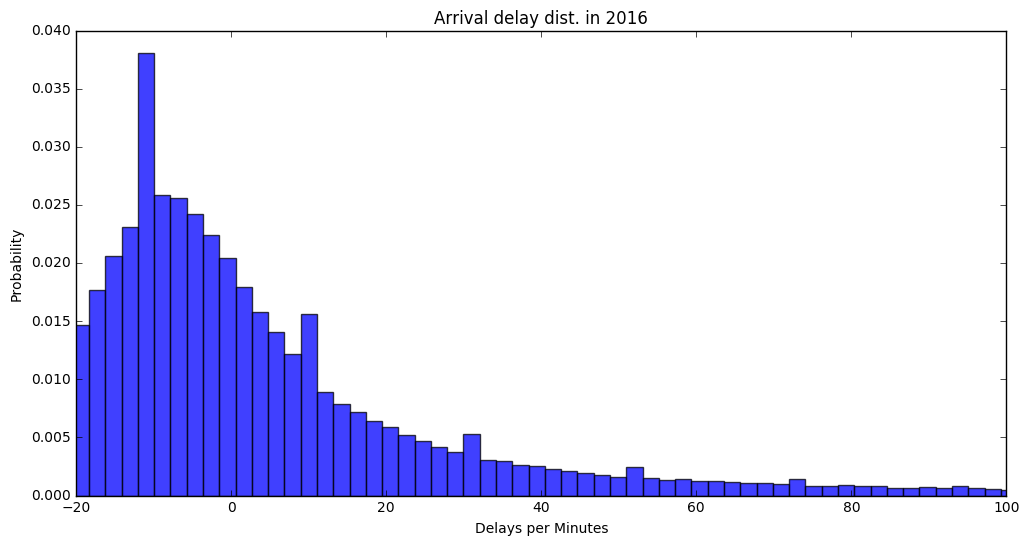

In [7]:
# plot arrival delay distribution
plt.figure(figsize=(12, 6))
plt.hist(DB.ARR_DELAY,bins = 1000,normed=1, alpha=0.75)
plt.xlim(-20,100)
plt.xlabel('Delays per Minutes')
plt.ylabel('Probability')
plt.title('Arrival delay dist. in 2016')
plt.show()

The graph above show the distribution of delays per minutes. It shows that there is a higher probability of short delays and in fact negative delays meaning that the flights arrive before the scheduled arrival time. This means that the majority of flights arrive on time or even arrive ealier. Howevr, the right skewed graph (right tail) shows outliers- that is some flight have long delays (upto one and half hour maybe even more) and other flights arrive much ealier. Therefore, the next step is to remove outliers, in this case outliers 3 standard deviation away.

In [5]:
# remove outliters 3 std away
ARR_DELAY = DB.ARR_DELAY
ARR_mean = DB.ARR_DELAY.mean()
ARR_std = DB.ARR_DELAY.std()
outliers = ARR_DELAY[ARR_DELAY-ARR_mean >3*ARR_std] 

print (' %.1f' % (len(outliers)*100./len(ARR_DELAY)),'%' ' of outliers will be removed')

 1.7 % of outliers will be removed


In [6]:
DB_new = DB.copy()
DB_new = DB.drop(outliers.index) # drop outliers and save it in a new DF

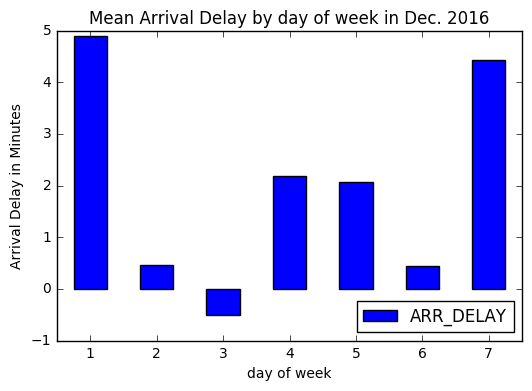

In [10]:
## show average delay by minutes for days of the week
DB_new[['DAY_OF_WEEK','ARR_DELAY']].groupby('DAY_OF_WEEK').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('day of week')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Mean Arrival Delay by day of week in Dec. 2016')
plt.show()

It seems that there are more delays on Sundays and Mondays (delays 4:30 to 5:00 mins) followed by Thursdays and Fridays. It also shows that on Wednesday that is is negative, which means that flights arrive earlier. This indicates that airports are busier (more people travel on these days) on Monday, Sunday then the rest of the week with least delays on Wednesdays, Tuesdays and Saturdays. However, the delays are on average below 5 mins during peak days.

Also, maybe the time of the day have an effect. Usually, when some flights delay, they affect other flights. For instance, if a flights early morning have delays then they would affect other flights since air traffic control have to reschedule and manage congestions by delaying other fligths from landing. 

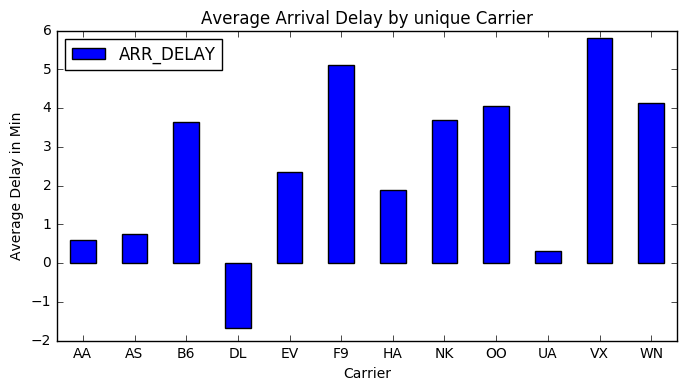

In [11]:
# show average delays per minutes for unique carriers
DB_new[['UNIQUE_CARRIER','ARR_DELAY']].groupby('UNIQUE_CARRIER').mean().plot(kind='bar',figsize =(8,4))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by unique Carrier')
plt.show()

The graph above shows the average delays per minutes by 10 carriers. It indicate that some airlines have more delays than others with a considerable delay. For example,  VX and F9 have the highest delays amongst all other carrier. Also, DL arrives ealier than scheduled. Carriers differ by the number of flights (small airline or large company), and the airports where they operate thus this have an effect on the delays. As an example, Delta and US Air are large company and more common/mainstream, Both showed very small delays. 

In [12]:
## add new on_time column
on_time = DB_new['ARR_DEL15'] ==0
DB_new.loc[:,'on_time'] = on_time

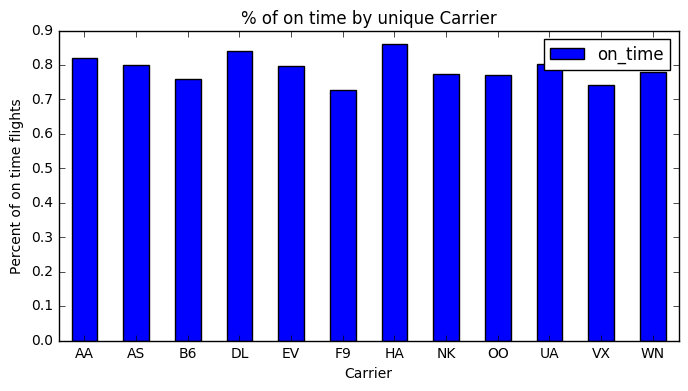

In [13]:
# Show the percentage of flights that arrive on time for unique carriers
DB_new[['UNIQUE_CARRIER','on_time']].groupby('UNIQUE_CARRIER').mean().plot(kind='bar',figsize =(8,4))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Percent of on time flights')
plt.title('% of on time by unique Carrier')
plt.show()

All the airline are more than 70% on time. But again it varies between major airlines and small airline, number of flights, number of hours of their flights and between which airports they operate. F9 for instance have the lowest on time precentage and HA have the highest probability of arriving on time. Overall, less popular airlines have more more delays.

In [14]:
# check arrival delays for the 10 busiest airports (for the purpuse of visualisation just to have an idea about arrivals delays
# per origin and destination airports however the entire cleaned dataset will be used later when building the classifier)
Busiest_AP = ['ATL','LAX','ORD','DFW','JFK','DFN','SFO','CLT','LAS','PHX']
DF = DB_new.loc[DB_new['ORIGIN'].isin(Busiest_AP) & DB_new['DEST'].isin(Busiest_AP)]

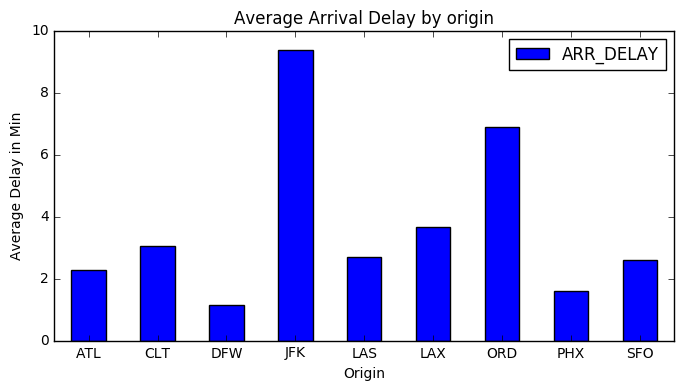

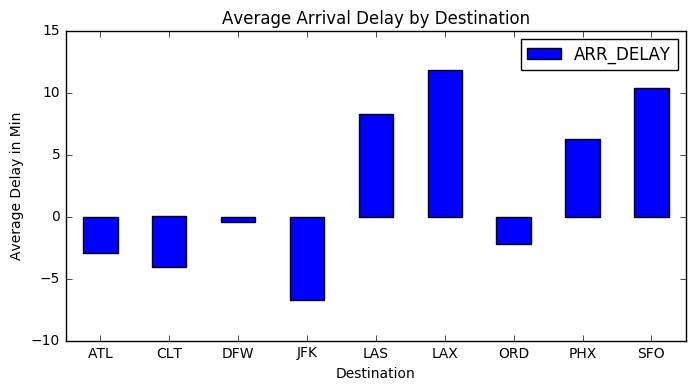

In [15]:
 # plot Average arrival delays per minutes grouped origin
DF[['ARR_DELAY','ORIGIN']].groupby('ORIGIN').mean().plot(kind='bar',figsize =(8,4))
plt.xticks(rotation=0)
plt.xlabel('Origin')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by origin')
plt.show()

# plot Average arrival delays per minutes grouped by destination
DF[['ARR_DELAY','DEST']].groupby('DEST').mean().plot(kind='bar',figsize =(8,4))
plt.xticks(rotation=0)
plt.xlabel('Destination')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Destination')
plt.show()

Average Arrival delay by origin graph: illustrate the impact of origin aiport on the delays. Example, travelling from JFK have the highest delays followed by ORD (I assume since it is a very busy airport and too many flights connect their), unlike DFW which shows that this airport have the least delays.

Average Arrival delay by destination graph: there is a considerable variations between destination airport. If someone is travelling to JFK, then the flight will land earlier then scheduled, similarly for CLT, ATL, ORD and DFW. However, travelling to LAS, LAX, SFO and PHX then we should expect some delays upto 13 mins. 

These graphs shows the importance of origin and destination airports on the flight delays.

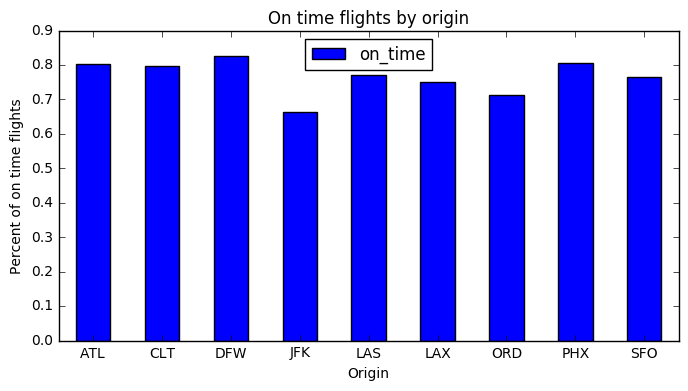

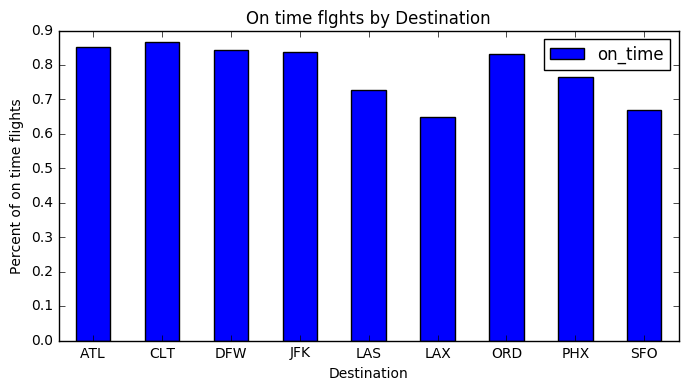

In [16]:
 # plot Average on time flights grouped origin
DF[['on_time','ORIGIN']].groupby('ORIGIN').mean().plot(kind='bar',figsize =(8,4))
plt.xticks(rotation=0)
plt.xlabel('Origin')
plt.ylabel('Percent of on time flights')
plt.title('On time flights by origin')
plt.show()

# plot verage on time flights  grouped by destination
DF[['on_time','DEST']].groupby('DEST').mean().plot(kind='bar',figsize =(8,4))
plt.xticks(rotation=0)
plt.xlabel('Destination')
plt.ylabel('Percent of on time flights')
plt.title('On time flghts by Destination')
plt.show()

### Data preprocessing 

In [7]:
## most of the features in this dataset is categorical, therefore the three other numerical 
# features will be transformed into categorical features for the classifier

# varlist represents all used columns
varlist = ['MONTH','DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN','DEST','DEP_TIME','ARR_TIME'
           ,'CANCELLED','DIVERTED','CRS_ELAPSED_TIME', 'DISTANCE','ARR_DEL15']

output = DB_new['ARR_DEL15'] # label 
features = DB_new[varlist[:-1]] # columns that will be used as fearture indicators

# tranform into categorical varibales 0/1
dummy_features=pd.get_dummies(features,columns = ['UNIQUE_CARRIER','ORIGIN','DEST'] ); 


### split dataset into train and test sets

In [8]:
## split the dataset into 70% training data and 30% test data
from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test,y_train,y_test = train_test_split(dummy_features,output,test_size =0.3,random_state =20)

### Build Random Forest classifier

Random forest is powerful ensemble learning method that is used for both classification and prediction. This method can also be used for both categorical data for classification and continuous data (for regression). The random forest algorithm, in the training phase, creates many decision trees with a selected number of features (with replacement) in each tree. The outcome class is the average of all classes in each decision tree created during the training phase. Moreover, this method is less sensitive to outliers (which we removed in this case) and avoids over-fitting of individual decision trees. Therefore, it is appropriate in this case to use Random forest especially since we have so many observations RF is reseanably fast and easy to use.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation 
from sklearn.metrics import f1_score, make_scorer

## build RF classifer 
RF = RandomForestClassifier(n_estimators=50,n_jobs=-1)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [9]:
## prediction on training set
predict_train = RF.predict(X_train)

In [13]:
# check accuracy on the entire train set (without cross validation)
from sklearn import metrics
train_accuracy = metrics.accuracy_score(predict_train,y_train)
print ("Train Accuracy : %s" % "{0:.3%}".format(train_accuracy))

Train Accuracy : 99.943%


Accuracy on the entire training set is almost 100%, which means that the classifier was able to predict all labels correctly which is the ultimate case of overfitting. This could be a result of uneven distribution of data or similar classification cases that made this file very easy to classify. This however does not mean that the classifier is not good, and it might show reasonable results on test set. Next I will use cross validation and check its accuracy which is a better indicator of the goodness of a classifier.

In [9]:
## function cross val returns mean accuracy of all Kfolds
def cross_validate(estimator,X_train,y_train):
    scorer = make_scorer(f1_score, average='micro')
    score = cross_val_score(estimator=estimator,X = X_train,y=y_train,scoring= scorer,cv=3)
    print ('CV accuracy: %.3f ' % (np.mean(scores)))

In [25]:
## mean CV accuracy 
cross_validate(RF,X_train,y_train)

CV accuracy: 0.836 


Unlike the previous results where the model was overfitting - 100% accuracy, it showed now a 83.6% accuracy which is good/fair results. This could mean that using 3 fold helped in forming a more balanced distribution. Thus this model should be good classifier to check whether or not the flight will be delayed (binary 1/0). One more step towards building the final model is Grid Search to fine tune our model by finding the best parameters that will help correctly predict unseen examples.

In [ ]:
## In this grid search, only few parameters will be tested since we have 400+ thousands of examples, it will take too much 
# (so far it's been running for exactly 5 hours and still not done)
# to run and more and more as we increase the parameters.
# 7 parameters (3 params for max feature and 4 for n_estimators) are tested on 3 cross validation
from sklearn.grid_search import GridSearchCV

RFC = RandomForestClassifier(random_state = 0)
params = {'max_features':('auto','log2',None), 'n_estimators':[20,50,100,200]}
RFC_gs = GridSearchCV(RFC,params,scoring='accuracy',n_jobs =-1,cv=3)
RFC_gs.fit(X_train,y_train)
#print(RFC_gs.best_score_)
#print(RFC_g.best_params_)

the code block above ran for 7 hours and 30 mins , however the was a typo in the last print line print(RFC_g.best_params_), RFC_g instead of RFC_gs there was no need to re-run it since the grid search is complete.

In [40]:
print(RFC_gs.best_score_)
print(RFC_gs.best_params_)

0.8531012858950424
{'n_estimators': 200, 'max_features': None}


The accuracy improved by almost 2% using 200 estimators and max feature is None.
Now we will build the final fine tuned model using the best parameters from the grid search: 'n_estimators'= 200, 'max_features'= None as mentioned ealier.

### Random Forest optimized model

In [17]:
from sklearn.ensemble import RandomForestClassifier

## function to train on the new fine tuned model 
def train_final_RF(X_train,y_train):
    
    RF_final = RandomForestClassifier(n_estimators=200,max_features= None, n_jobs=-1)
    RF_final.fit(X_train,y_train)
    
    return RF_final

In [18]:
RF_final = train_final_RF(X_train,y_train)

In [21]:
## predictions on the test set
def test_RF(model,X_test,y_test):
    
    predicted = model.predict(X_test)
    test_accuracy = metrics.accuracy_score(predicted,y_test)
    print ("Test Accuracy- accuracy_score: %s" % "{0:.3%}".format(test_accuracy)) # print accuracy using accuracy_score metric
    
    test_f1_score = metrics.f1_score(predicted,y_test, average='micro')
    print ("Test Accuracy- f1_score: %s" % "{0:.3%}".format(test_f1_score)) # print accuracy of f1_score

In [22]:
test_RF(RF_final,X_test,y_test)

Test Accuracy- accuracy_score: 86.105%
Test Accuracy- f1_score: 86.105%
